## We import the necesary libraries and load the given dataset (load_boston)

In [62]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
target = boston_dataset.target
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### We analyze the satate of the dataset

In [2]:
boston.isnull().sum()
#There is no nulls

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)


/Users/josebaelcano/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Variables')

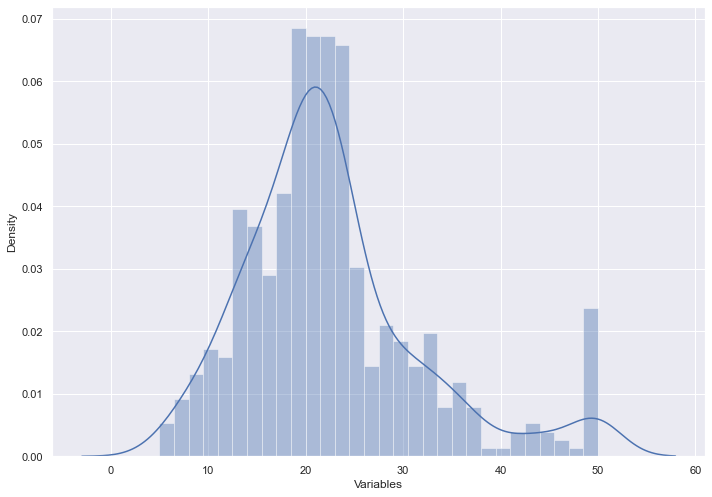

In [7]:
#We check the distribution of the data appling a normality test 
print(stats.normaltest(target))
#The pValue < 0.001 then we confirm the data follows a normal fistribution

#To be sure we display the distribution 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(target, bins=30)
plt.xlabel('Variables')


In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<AxesSubplot:>

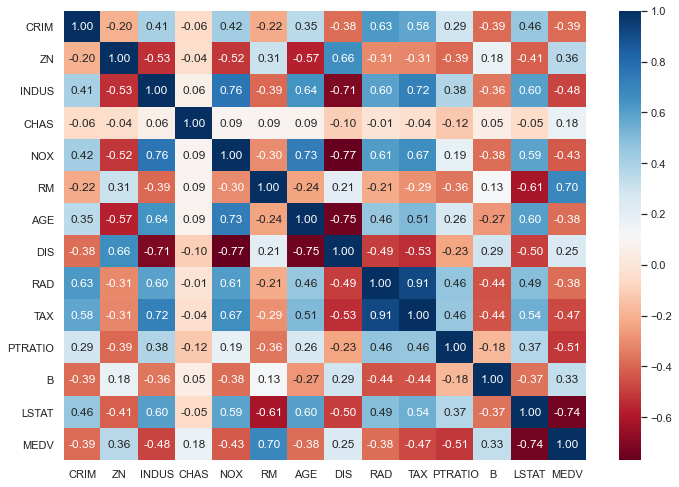

In [8]:
#We check the correlation between all the variables
todo = boston
todo['MEDV'] = boston_dataset.target
sns.heatmap(todo.corr(method = 'pearson'), cmap='RdBu', annot=True, fmt=".2f")

#### We see the target 'MEDV' variable has  high correlation with LSTAT(-0.737663) and RM(0.695360). Then we represent what is the trend of them.

We find also high correlation between the variables 'TAX' and 'RAD' (0.910228) then we will dispense with the variable 'TAX'

Text(0, 0.5, 'MEDV - (x$1000)')

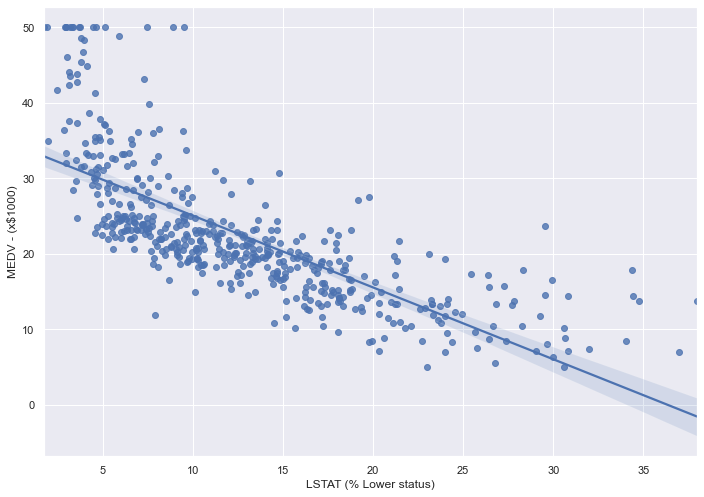

In [9]:
todo = boston
todo['MEDV'] = boston_dataset.target
sns.regplot(x="LSTAT", y="MEDV", data=todo);
plt.xlabel('LSTAT (% Lower status)')
plt.ylabel('MEDV - (x$1000)')
#We see how the prices($1000x) decrease when the Lower Status of the population (%) increases

Text(0, 0.5, 'MEDV - (x$1000)')

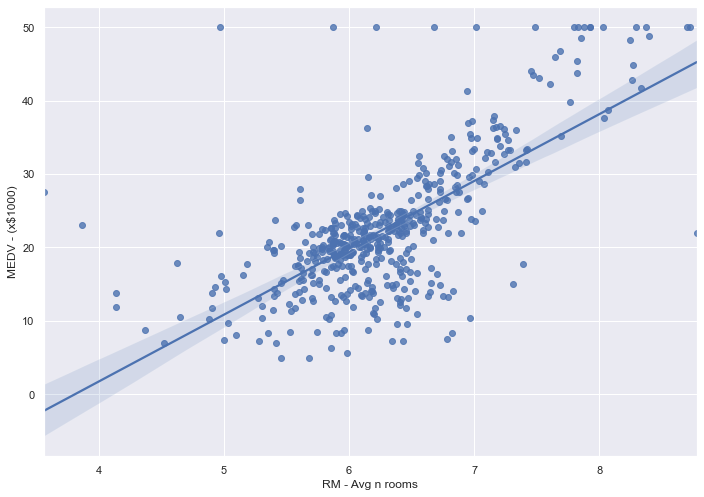

In [10]:
#we plot also the variable 
sns.regplot(x="RM", y="MEDV", data=todo);
plt.xlabel('RM - Avg n rooms')
plt.ylabel('MEDV - (x$1000)')
#The price increases when the average number of rooms per dwelling increases 

### We proceed to create our model

In this case we are going to use a Lineal regresion model, but later we will compare it with a polynomial regression model of degree 2 due to we have the the suspicion that a polynomial regression could fit better this data.

### Lineal_regression

In [57]:
def regresion_lineal_train(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train_predict, Y_train)))
    r2 = r2_score(Y_train, y_train_predict)
    
     
def regresion_lineal_test(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    # model evaluation for training set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)
    print('rmse = ',rmse)  # Smaller better (less error)
    print('r2 = ',r2)    #lower better
    

In [58]:
#Aplicamos regresión lineal con estas 2 variables 

X_simply = todo[['LSTAT','RM']] # Only the 2 variables that are high correlated with the output

X_one_drop = todo.drop(['MEDV','TAX'],1) # Dropping the variable that is highly correlate with another one

X_all = todo.drop('MEDV',1) #All data

In [59]:
regresion_lineal_test(X_simply,target)

rmse =  5.137400784702913
r2 =  0.662899697518695


In [60]:
regresion_lineal_test(X_one_drop,target)

rmse =  4.601207135138512
r2 =  0.729594316249763


In [61]:
regresion_lineal_test(X_all,target)

rmse =  4.568292042303204
r2 =  0.733449214745308


### Lineal regression Conclusions:

On this model we have checked how including all the variables we get a lower RMSE matric (meaning that the error of the prediction decreases) and a higher R2 (meaning that the prediction fits better the prediction)

### Polynomial Regression - 2nd degree 

As we said in the previous section we are gonna perform a Polynomial regression model to see if we get better results than the Lineal regression.

To do so we are gonna compare between the 3 different transformations of the dataset as we did on the previous section.

In [53]:
def regresion_poli2_train(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg.fit(X_poly, Y_train)
    regressor_poly2 = LinearRegression()
    regressor_poly2.fit(X_poly, Y_train)
    
    y_pred = regressor_poly2.predict(poly_reg.fit_transform(X_train))
    r2_poly2 = r2_score(Y_train, y_pred)
    
    rmse_poly2 = (np.sqrt(mean_squared_error(Y_train, y_pred)))
    
    print('rmse',rmse_poly2)
    print('r2',r2_poly2)
   
    

def regresion_poli2_test(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg.fit(X_poly, Y_train)
    regressor_poly2 = LinearRegression()
    regressor_poly2.fit(X_poly, Y_train)
    
    y_pred = regressor_poly2.predict(poly_reg.fit_transform(X_test))
    
    r2_poly2 = r2_score(Y_test, y_pred)
    rmse_poly2 = (np.sqrt(mean_squared_error(Y_test, y_pred)))
    
    
    print('rmse',rmse_poly2)
    print('r2',r2_poly2)
   
    

In [54]:
regresion_poli2_test(X_simply,target)

rmse 3.7848198845450294
r2 0.8170372495892189


In [55]:
regresion_poli2_test(X_one_drop,target)

rmse 3.2208519615452422
r2 0.8675006417505821


In [56]:
regresion_poli2_test(X_all,target)

rmse 3.1965276517917114
r2 0.8694943908410793


### Polynomial Regression  Conclusions:

As in the previous section we have lower RMSE and higher R2 using the dataset with all the variables as in the Lineal regression.


### Final conclusions

Also we can see how the prediction fits better than with the Lineal Regression. The reason of this improvement could be due to the nature of the distribution of the data.

Lineal Regression -> R2 = 0.733449214745308,  RMSE = 4.568292042303204 \
Polynomial Regression -> R2 = 0.8694943908410793, 3.1965276517917114